In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
c =0.299792458
n =1.3195
v=c/n 
print(v)

0.2272015596816976


In [3]:
info_d = []
info_s = []
data_d = []
data_s = []

for i in range(0,10):
    name_dd = "../data/Tau05to15PeV_00{0}_data.npy".format(i)
    name_di = "../data/Tau05to15PeV_00{0}_info.pkl".format(i)
    name_sd = "../data/Electron05to15PeV_00{0}_data.npy".format(i)
    name_si = "../data/Electron05to15PeV_00{0}_info.pkl".format(i)
    info_d_temp = pickle.load(open(name_di, "rb"))
    info_s_temp = pickle.load(open(name_si, "rb"))
    data_d_temp = np.load(name_dd ,allow_pickle=True,encoding='bytes')
    data_s_temp = np.load(name_sd ,allow_pickle=True,encoding='bytes')
    info_d = info_d + info_d_temp
    info_s = info_s + info_s_temp
    data_d.append(data_d_temp)    
    data_s.append(data_s_temp)
data_d = np.vstack(data_d)
data_s = np.vstack(data_s)
info_d = np.array(info_d)
info_s = np.array(info_s)

In [4]:
energy_l_d = []
energy_nu_d = []
charge_d = []
charge_st_d = []
for i in info_d:
    energy_l_d.append(i['tau_energy'])
    energy_nu_d.append(i['nu_energy'])
    charge_d.append(i['qtotal'])
    charge_st_d.append(i['strings']['charge'])

energy_l_d = np.array(energy_l_d)
energy_nu_d = np.array(energy_nu_d)
charge_d = np.array(charge_d)
charge_st_d = np.array(charge_st_d)

energy_l_s = []
energy_nu_s = []
charge_s = []
charge_st_s = []
for i in info_s:
    energy_l_s.append(i['tau_energy'])
    energy_nu_s.append(i['nu_energy'])
    charge_s.append(i['qtotal'])
    charge_st_s.append(i['strings']['charge'])

energy_l_s = np.array(energy_l_s)
energy_nu_s = np.array(energy_nu_s)
charge_s = np.array(charge_s)
charge_st_s = np.array(charge_st_s)
 
print(len(energy_l_d),len(energy_nu_d),len(charge_d),len(charge_st_d))
print(len(energy_l_s),len(energy_nu_s),len(charge_s),len(charge_st_s))

10062 10062 10062 10062
24019 24019 24019 24019


In [5]:
def Plot(arr1,arr2, bs =100, r = [0,100], lab = "Charge"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    weights1 = np.ones_like(arr1)/float(len(arr1))
    weights2 = np.ones_like(arr2)/float(len(arr2))
    #ax.set_yscale(scale)
    #ax.set_title(name, fontsize = 14)
    ax.text(0.5,0.95,'#Events single '+str(len(arr1)), transform=ax.transAxes, color = "black",fontsize=8)
    ax.text(0.5,0.90,'#Events double '+str(len(arr2)), transform=ax.transAxes, color = "black",fontsize=8)
    ax.set_xlabel(lab, fontsize = 14)                                                              
    ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
    ax.hist(arr1, bins =bs, weights = weights1, range = r, histtype = 'step',edgecolor ='r', fill= False, label = 'Single')
    ax.hist(arr2, bins =bs, weights = weights2, range = r, histtype = 'step',edgecolor ='b', fill= False, label = 'Double')


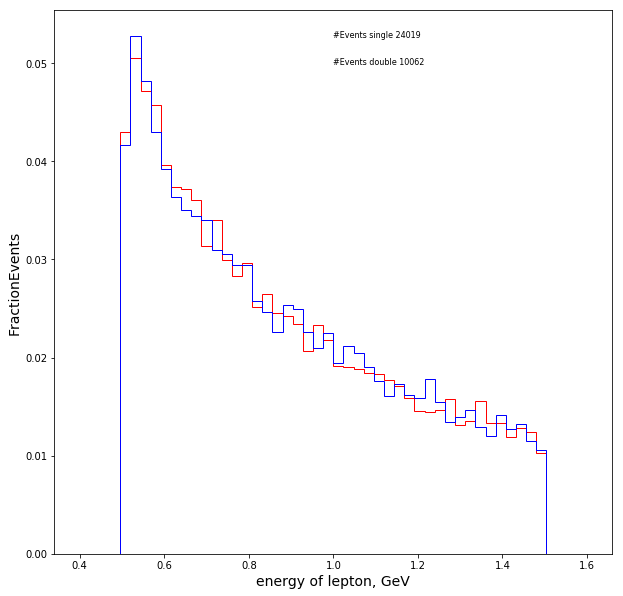

In [6]:
Plot(energy_l_s/1000000,energy_l_d/1000000, bs =50, r = [0.4,1.6], lab = "energy of lepton, GeV")

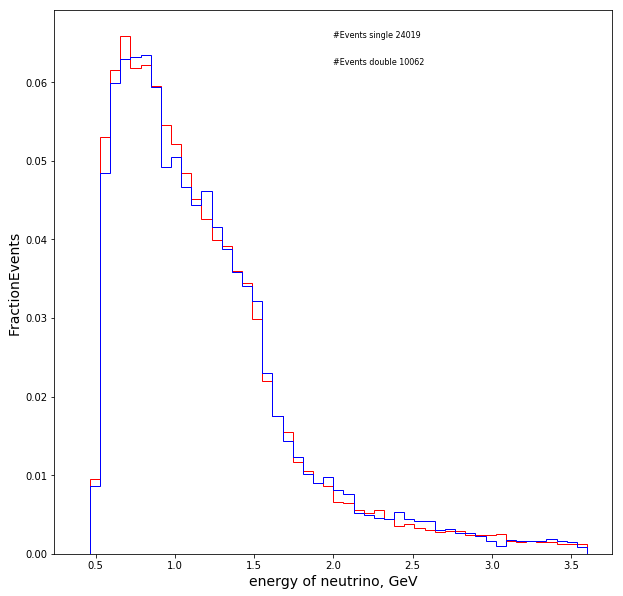

In [7]:
Plot(energy_nu_s/1000000,energy_nu_d/1000000, bs =50, r = [0.4,3.6], lab = "energy of neutrino, GeV")

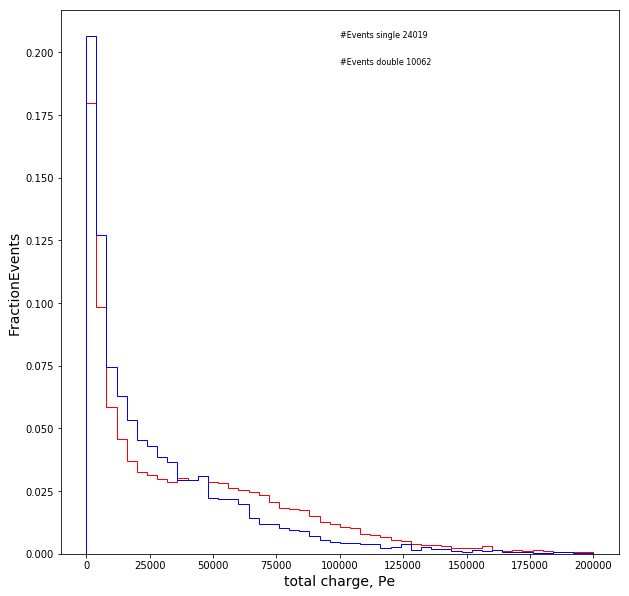

In [8]:
Plot(charge_s,charge_d,bs = 50, r= [0,200000], lab = "total charge, Pe")

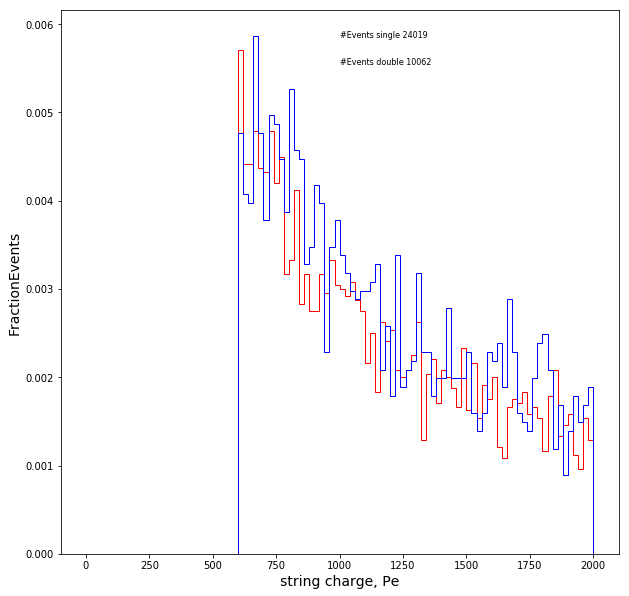

In [9]:
Plot(charge_st_s,charge_st_d,bs = 100, r= [0,2000], lab = "string charge, Pe")

In [10]:
print(info_d.shape, data_d.shape)
print(info_s.shape, data_s.shape)
print(type(data_d_temp[0][0][0]))

(10062,) (10062, 300, 60)
(24019,) (24019, 300, 60)
<class 'numpy.float64'>


In [11]:
print(np.amax(data_d))
print(np.amin(data_d))
print(np.amax(data_s))
print(np.amin(data_s))

6.405907616717559e-09
-5.962297593924894e-11
6.883592770365534e-09
-6.128851422642174e-11


In [12]:
from keras.utils import to_categorical
label_d = [[0,1]]*len(data_d)
label_s = [[1,0]]*len(data_s)
label_d = np.array(label_d)
label_s = np.array(label_s)
print(label_d.shape)
print(label_s.shape)
print(label_d[0])
print(label_s[0])

Using TensorFlow backend.


(10062, 2)
(24019, 2)
[0 1]
[1 0]


(34081, 300, 60)
(34081, 2)
[0 1]


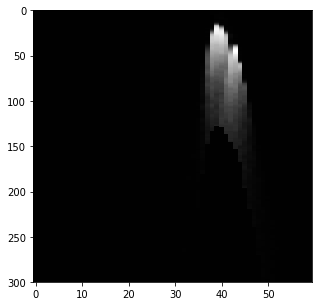

In [13]:
data = np.concatenate((data_d, data_s), axis = 0) 
label = np.concatenate((label_d, label_s), axis = 0) 
print(data.shape)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(data[2], interpolation='nearest', aspect='auto', cmap= 'gray')
print(label.shape)
print(label[2])

In [14]:
from sklearn.utils import shuffle

(34081, 300, 60) (34081, 2)
[0 1]


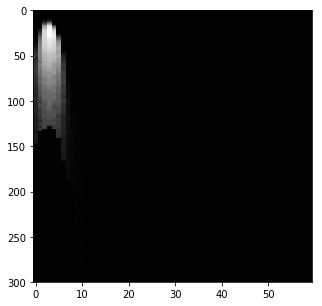

In [15]:
data, label = shuffle(data, label, random_state =12)
print(data.shape, label.shape)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(data[2], interpolation='nearest', aspect='auto', cmap= 'gray')
print(label[2])

In [16]:
train_data = data[:26000]
train_label = label[:26000]
train_data = train_data.reshape((len(train_data),300,60,1))
train_data = train_data.astype('float32')/10**-8
mean = np.mean(train_data)
std = np.std(train_data)
print(mean,std)
train_data = train_data - mean
train_data = train_data/std

valid_data = data[26000:30000]
valid_label = label[26000:30000]
valid_data = valid_data.reshape((len(valid_data),300,60,1))
valid_data = valid_data.astype('float32')/10**-8
valid_data = valid_data - mean
valid_data = valid_data/std

test_data = data[30000:]
test_label = label[30000:]
test_data = test_data.reshape((len(test_data),300,60,1))
test_data = test_data.astype('float32')/10**-8
test_data = test_data - mean
test_data = test_data/std


0.002656849 0.022218607


In [17]:
print(np.amax(train_data))
print(np.amin(train_data))

30.861628
-0.39488828


In [18]:
from keras import layers
from keras import models

In [19]:
#for im in data_d[:100]:
#    print(im.shape)
#    fig = plt.figure(figsize=(12, 12))
#    ax = fig.add_subplot(111)
#    ax.imshow(im, interpolation='nearest', aspect='auto', cmap= 'gray')
    #ax.plot(im[14,:])
    #print(im[:,46])

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(300, 60, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

W0711 17:44:00.180018 140113549125376 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 17:44:00.206673 140113549125376 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 17:44:00.210681 140113549125376 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 17:44:00.230505 140113549125376 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 296, 56, 32)       832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 28, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 26, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 60736)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3887168   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total para

In [21]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

W0711 17:44:08.364710 140113549125376 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 17:44:08.374800 140113549125376 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [22]:
history = model.fit(train_data,train_label, epochs=20, validation_data=(valid_data,valid_label), batch_size =256)

W0711 17:44:12.950005 140113549125376 deprecation.py:323] From /home/dup193/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0711 17:44:13.008960 140113549125376 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 26000 samples, validate on 4000 samples
Epoch 1/20
26000/26000 [==============================] - 119s 5ms/step - loss: 0.5989 - acc: 0.7058 - val_loss: 0.5936 - val_acc: 0.7015
Epoch 2/20
26000/26000 [==============================] - 117s 4ms/step - loss: 0.5844 - acc: 0.7109 - val_loss: 0.5862 - val_acc: 0.7063
Epoch 3/20
26000/26000 [==============================] - 116s 4ms/step - loss: 0.5770 - acc: 0.7150 - val_loss: 0.5833 - val_acc: 0.7083
Epoch 4/20
26000/26000 [==============================] - 116s 4ms/step - loss: 0.5694 - acc: 0.7212 - val_loss: 0.5852 - val_acc: 0.7150
Epoch 5/20
26000/26000 [==============================] - 116s 4ms/step - loss: 0.5634 - acc: 0.7277 - val_loss: 0.5821 - val_acc: 0.7210
Epoch 6/20
26000/26000 [==============================] - 117s 4ms/step - loss: 0.5584 - acc: 0.7330 - val_loss: 0.5699 - val_acc: 0.7290
Epoch 7/20
26000/26000 [==============================] - 117s 5ms/step - loss: 0.5546 - acc: 0.7390 - val_loss: 0.5763 - v

In [23]:
model.save('DP_model_1.h5')

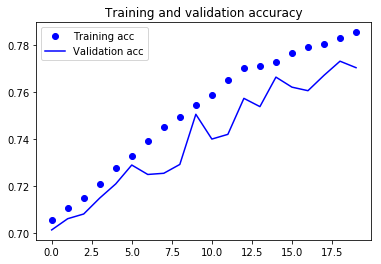

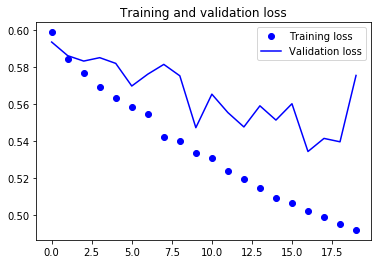

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
result = model.evaluate(test_data,test_label)
print(result)

4081/4081 [==============================] - 4s 941us/step
[0.5753769717418631, 0.7591276648610692]


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
test_pred = model.predict(test_data)
matrix = confusion_matrix(test_label.argmax(axis=1), test_pred.argmax(axis=1))
report = classification_report(test_label.argmax(axis=1), test_pred.argmax(axis=1))

In [28]:
#print("True Positive",tp)
#print("True Negative",tn)
#print("False Positive",fp)
#print("False Negative",fn)
print(matrix)
print(report)

[[2780   47]
 [ 936  318]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      2827
           1       0.87      0.25      0.39      1254

    accuracy                           0.76      4081
   macro avg       0.81      0.62      0.62      4081
weighted avg       0.79      0.76      0.71      4081



In [89]:
(0.26*581 + 0.96*1419)/2000

0.7566499999999999